# Emergency 911 Call Analysis

In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
from scipy import stats
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
import pylab as plt

In [2]:
#First read in the Excel File to a data frame for analysis
df = pd.read_excel('Raw Data.xlsx', sheet_name = 'Seattle_Police_Departme')

## I. Analyze the Data

In [3]:
df

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time,OFFICERS_AT_SCENE
0,1702311,16000104983,2016104983,242,FIGHT DISTURBANCE,DISTURBANCES,DISTURBANCES,2016-03-26 17:17:00,46XX BLOCK OF 38 AV S,R,R3,10100.2019,-122.284904,47.561256,"(47.561256, -122.284904)",FIGHT - IP - PHYSICAL (NO WEAPONS),DISTURBANCES,DISTURBANCES,NaT,2
1,1702312,16000104976,2016104976,470,PARKING VIOLATION (EXCEPT ABANDONED VEHICLES),PARKING VIOLATIONS,TRAFFIC RELATED CALLS,2016-03-26 17:15:00,29 AV / E ALDER ST,G,G2,8800.3002,-122.294930,47.604195,"(47.604195, -122.29493)",PARKING VIOLATION (EXCEPT ABANDONED CAR),TRAFFIC RELATED CALLS,PARKING VIOLATIONS,NaT,2
2,1702316,16000104995,2016104995,460,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,2016-03-26 17:19:00,WEST SEATTLE BR WB / 1 AV S ON RP,O,O1,9300.3060,-122.335240,47.571580,"(47.57158, -122.33524)",TRAFFIC - MOVING VIOLATION,TRAFFIC RELATED CALLS,PARKING VIOLATIONS,NaT,0
3,1702317,16000104994,2016104994,280,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:26:00,24XX BLOCK OF 35 AV W,Q,Q1,5600.4030,-122.402370,47.640358,"(47.640358, -122.40237)","SUSPICIOUS PERSON, VEHICLE OR INCIDENT",SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,NaT,2
4,1702318,16000104993,2016104993,281,SUSPICIOUS VEHICLE,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:19:00,24 AV / E ALDER ST,G,G2,8800.3008,-122.301090,47.604320,"(47.60432, -122.30109)","SUSPICIOUS PERSON, VEHICLE OR INCIDENT",SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,NaT,1
5,1702319,16000104992,2016104992,176,LIQUOR VIOLATION - ADULT,LIQUOR VIOLATIONS,LIQUOR VIOLATIONS,2016-03-26 17:17:00,92XX BLOCK OF RAINIER AV S,S,S3,11800.6020,-122.268030,47.519850,"(47.51985, -122.26803)",LIQUOR VIOLATIONS - ADULT,LIQUOR VIOLATIONS,LIQUOR VIOLATIONS,NaT,2
6,1702321,16000104986,2016104986,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 17:18:00,27XX BLOCK OF RAINIER AV S,R,R2,10001.1002,-122.299160,47.579674,"(47.579674, -122.29916)",TRESPASS,TRESPASS,TRESPASS,NaT,3
7,1702322,16000104962,2016104962,201,ALACAD - RESIDENTIAL BURGLARY (FALSE),BURGLARY ALACAD (FALSE),FALSE ALACAD,2016-03-26 17:17:00,66XX BLOCK OF S BANGOR ST,S,S3,11900.2016,-122.250630,47.506386,"(47.506386, -122.25063)","ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE",ALACAD,SUSPICIOUS CIRCUMSTANCES,NaT,1
8,1702323,16000104918,2016104918,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 17:18:00,4 AV S / S LANDER ST,O,O1,9300.3019,-122.329056,47.579807,"(47.579807, -122.329056)","HARAS - NO BIAS, THREATS OR MALICIOUSNESS","THREATS, HARASSMENT","THREATS, HARASSMENT",2016-03-26 15:56:00,3
9,1702324,16000104794,2016104794,65,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,2016-03-26 17:14:00,9XX BLOCK OF 14 AV E,C,C1,6500.3017,-122.314590,47.627274,"(47.627274, -122.31459)",THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),OTHER PROPERTY,THEFT,NaT,1


#### From initial inspection, some features carry redundant information: longitude, Latitude, Incident Location, Hundred Block Location; District/Sector and Zone/Beat
#### Additionally, At Scene Time is missing many values 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 20 columns):
CAD CDW ID                     1046 non-null int64
CAD Event Number               1046 non-null int64
General Offense Number         1046 non-null int64
Event Clearance Code           1046 non-null int64
Event Clearance Description    1046 non-null object
Event Clearance SubGroup       1046 non-null object
Event Clearance Group          1046 non-null object
Event Clearance Date           1046 non-null datetime64[ns]
Hundred Block Location         1046 non-null object
District/Sector                1045 non-null object
Zone/Beat                      1046 non-null object
Census Tract                   1045 non-null float64
Longitude                      1046 non-null float64
Latitude                       1046 non-null float64
Incident Location              1046 non-null object
Initial Type Description       1046 non-null object
Initial Type Subgroup          1046 non-null object
In

#### This information validates the fact that only 400 values are present in the At Scene Time Column 
#### For consistency's sake, the OFFICERS_AT_SCENE feature should be altered in style to match the others 
#### Zone/Beats, Incident Type Group, Incident Type Subgroup, Distryct/Sector, Event Clearance Group, Event Clearance Subgroup, Event Clearance Code should be changed into categories instead of a Strings/int64
#### CAD CDW ID, CAD Event Number, General Offense Number should be changed to strings instead of int64


In [5]:
df[df['CAD CDW ID'].duplicated()]

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time,OFFICERS_AT_SCENE


#### The lack of duplicated events seems to indicate accurate recording for the most part and a trustworthy data set

In [6]:
df[df['At Scene Time'].isnull()]

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time,OFFICERS_AT_SCENE
0,1702311,16000104983,2016104983,242,FIGHT DISTURBANCE,DISTURBANCES,DISTURBANCES,2016-03-26 17:17:00,46XX BLOCK OF 38 AV S,R,R3,10100.2019,-122.284904,47.561256,"(47.561256, -122.284904)",FIGHT - IP - PHYSICAL (NO WEAPONS),DISTURBANCES,DISTURBANCES,NaT,2
1,1702312,16000104976,2016104976,470,PARKING VIOLATION (EXCEPT ABANDONED VEHICLES),PARKING VIOLATIONS,TRAFFIC RELATED CALLS,2016-03-26 17:15:00,29 AV / E ALDER ST,G,G2,8800.3002,-122.294930,47.604195,"(47.604195, -122.29493)",PARKING VIOLATION (EXCEPT ABANDONED CAR),TRAFFIC RELATED CALLS,PARKING VIOLATIONS,NaT,2
2,1702316,16000104995,2016104995,460,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,2016-03-26 17:19:00,WEST SEATTLE BR WB / 1 AV S ON RP,O,O1,9300.3060,-122.335240,47.571580,"(47.57158, -122.33524)",TRAFFIC - MOVING VIOLATION,TRAFFIC RELATED CALLS,PARKING VIOLATIONS,NaT,0
3,1702317,16000104994,2016104994,280,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:26:00,24XX BLOCK OF 35 AV W,Q,Q1,5600.4030,-122.402370,47.640358,"(47.640358, -122.40237)","SUSPICIOUS PERSON, VEHICLE OR INCIDENT",SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,NaT,2
4,1702318,16000104993,2016104993,281,SUSPICIOUS VEHICLE,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:19:00,24 AV / E ALDER ST,G,G2,8800.3008,-122.301090,47.604320,"(47.60432, -122.30109)","SUSPICIOUS PERSON, VEHICLE OR INCIDENT",SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,NaT,1
5,1702319,16000104992,2016104992,176,LIQUOR VIOLATION - ADULT,LIQUOR VIOLATIONS,LIQUOR VIOLATIONS,2016-03-26 17:17:00,92XX BLOCK OF RAINIER AV S,S,S3,11800.6020,-122.268030,47.519850,"(47.51985, -122.26803)",LIQUOR VIOLATIONS - ADULT,LIQUOR VIOLATIONS,LIQUOR VIOLATIONS,NaT,2
6,1702321,16000104986,2016104986,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 17:18:00,27XX BLOCK OF RAINIER AV S,R,R2,10001.1002,-122.299160,47.579674,"(47.579674, -122.29916)",TRESPASS,TRESPASS,TRESPASS,NaT,3
7,1702322,16000104962,2016104962,201,ALACAD - RESIDENTIAL BURGLARY (FALSE),BURGLARY ALACAD (FALSE),FALSE ALACAD,2016-03-26 17:17:00,66XX BLOCK OF S BANGOR ST,S,S3,11900.2016,-122.250630,47.506386,"(47.506386, -122.25063)","ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE",ALACAD,SUSPICIOUS CIRCUMSTANCES,NaT,1
9,1702324,16000104794,2016104794,65,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,2016-03-26 17:14:00,9XX BLOCK OF 14 AV E,C,C1,6500.3017,-122.314590,47.627274,"(47.627274, -122.31459)",THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),OTHER PROPERTY,THEFT,NaT,1
10,1702325,16000105010,2016105010,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 17:36:00,3XX BLOCK OF 2 AV S,K,K3,9200.2028,-122.330810,47.600464,"(47.600464, -122.33081)","DISTURBANCE, MISCELLANEOUS/OTHER",DISTURBANCES,DISTURBANCES,NaT,3


In [7]:
#This equation takes NaN At Scene Time Values, divided by total observations, in order to determine the percentage of 
#Null values that the feature contains

646/1046

0.6175908221797323

#### At Scene Time contains 646 rows of NaN values. This is over 62% of the data set, indicating the feature should be removed.

In [8]:
#The info() feature showed one Null value in the Census Tract Feature. This code explores that observation

df[df['Census Tract'].isnull()]

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time,OFFICERS_AT_SCENE
224,1702543,16000105361,2016105361,460,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,2016-03-26 23:39:00,S KENYON ST / KENYON ON RP,NaN,FS,NaN,-122.334335,47.53204,"(47.53204, -122.334335)",TRAFFIC STOP - OFFICER INITIATED ONVIEW,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,NaT,1


#### The above observation has many NaN values and the Zone/Beat information value does not match the format of any other entries. This observation should therefore be removed due to the chance of input error skewing results. 

In [9]:
df.describe()

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Census Tract,Longitude,Latitude,OFFICERS_AT_SCENE
count,1.046000e+03,1.046000e+03,1.046000e+03,1046.000000,1045.000000,1046.000000,1046.000000,1046.000000
mean,1.702849e+06,1.600011e+10,2.016106e+09,251.477055,7032.281362,-122.332415,47.620956,1.889101
std,3.084839e+02,5.299296e+02,5.299296e+02,130.859335,3007.366113,0.029592,0.050883,1.189723
min,1.702311e+06,1.600010e+10,2.016105e+09,30.000000,100.200200,-122.419030,47.503387,0.000000
25%,1.702584e+06,1.600011e+10,2.016105e+09,172.250000,5100.202600,-122.347785,47.598301,1.000000
50%,1.702850e+06,1.600011e+10,2.016106e+09,245.000000,7900.400000,-122.332835,47.614090,2.000000
75%,1.703117e+06,1.600011e+10,2.016106e+09,289.500000,9200.202800,-122.315780,47.661684,3.000000
max,1.703382e+06,1.600011e+10,2.016107e+09,470.000000,12100.201300,-122.249120,47.734050,4.000000


#### The Census Tract feature max and 75% numbers seem extrordinarily high 

### Issues to be Fixed:

- From initial inspection, some features carry redundant information: Longitude, Latitude, Incident Location, Hundred Block Location; District/Sector and Zone/Beat
- Additionally, At Scene Time is missing many values 
- For consistency's sake, the OFFICERS_AT_SCENE feature should be altered in style to match the others 
- Zone/Beats, Incident Type Group, Incident Type Subgroup, District/Sector, Event Clearance Group, Event Clearance Subgroup, Event Clearance Code should be changed into categories instead of a Strings/int64
- CAD CDW ID, CAD Event Number, General Offense Number should be changed to strings instead of int64
- The Census Tract feature max and 75% numbers seem extrordinarily high 
- Remove NaN census observation 

# II. Clean the Data

#### Problem 1: 
- From initial inspection, some features carry redundant information: longitude, Latitude, Incident Location, Hundred Block Location; District/Sector and Zone/Beat

In [10]:
# In this code, I will remove the redundant columns: Incident Location, Hundred Block Location, and District/Sector
# While Hundred Block Location does provide additional information, for the purposes of this analysis, this is unnecessary
# detail and clouds the general message of the data set

# First create a copy of the dataframe to facilitate reproducibility
df_copy = df.copy()

# Drop the Incident Location feature
df_copy = df_copy.drop(['Incident Location'], axis=1)

# Drop the Hundred Block Location feature
df_copy = df_copy.drop(['Hundred Block Location'], axis=1)

# Drop the CAD CDW ID feature 
df_copy = df_copy.drop(['CAD CDW ID'], axis=1)

# Drop General Offense Number
df_copy = df_copy.drop(['General Offense Number'], axis=1)

# Drop excess Zone/Beat info 
df_copy = df_copy.drop(['Zone/Beat'], axis=1)

#Drop Initial Scene information 
df_copy = df_copy.drop(['Initial Type Description', 'Initial Type Group', 'Initial Type Subgroup'], axis=1)

- Test: 

In [11]:
df_copy.head()

,CAD Event Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,District/Sector,Census Tract,Longitude,Latitude,At Scene Time,OFFICERS_AT_SCENE
0,16000104983,242,FIGHT DISTURBANCE,DISTURBANCES,DISTURBANCES,2016-03-26 17:17:00,R,10100.2019,-122.284904,47.561256,NaT,2
1,16000104976,470,PARKING VIOLATION (EXCEPT ABANDONED VEHICLES),PARKING VIOLATIONS,TRAFFIC RELATED CALLS,2016-03-26 17:15:00,G,8800.3002,-122.294930,47.604195,NaT,2
2,16000104995,460,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,2016-03-26 17:19:00,O,9300.3060,-122.335240,47.571580,NaT,0
3,16000104994,280,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:26:00,Q,5600.4030,-122.402370,47.640358,NaT,2
4,16000104993,281,SUSPICIOUS VEHICLE,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:19:00,G,8800.3008,-122.301090,47.604320,NaT,1


#### Problem 2: 
- Additionally, At Scene Time is missing many values
- As Chapter 7 indicated, the proper approach for features missing extensive values is to either fill in the missing values, use a data mining feature capable of handling missing values, or to discard the feature entirely. In this case, the feature is missing 61.76% of the values, so the method I decided was most appropriate was to discard the feature

In [12]:
df_copy = df_copy.drop(['At Scene Time'], axis=1)

- Test: 

In [13]:
df_copy.head()

,CAD Event Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,District/Sector,Census Tract,Longitude,Latitude,OFFICERS_AT_SCENE
0,16000104983,242,FIGHT DISTURBANCE,DISTURBANCES,DISTURBANCES,2016-03-26 17:17:00,R,10100.2019,-122.284904,47.561256,2
1,16000104976,470,PARKING VIOLATION (EXCEPT ABANDONED VEHICLES),PARKING VIOLATIONS,TRAFFIC RELATED CALLS,2016-03-26 17:15:00,G,8800.3002,-122.294930,47.604195,2
2,16000104995,460,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,2016-03-26 17:19:00,O,9300.3060,-122.335240,47.571580,0
3,16000104994,280,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:26:00,Q,5600.4030,-122.402370,47.640358,2
4,16000104993,281,SUSPICIOUS VEHICLE,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:19:00,G,8800.3008,-122.301090,47.604320,1


#### Problem 3: 
- For consistency's sake, the OFFICERS_AT_SCENE feature should be altered in style to match the others 

In [14]:
# Here I use the rename function to match the style 

df_copy = df_copy.rename(index=str, columns={"OFFICERS_AT_SCENE": "Officers at Scene"})

#### Problem 4: 
- Zone/Beat, Incident Type Group, Incident Type Subgroup, Event Clearance Group, Event Clearance Subgroup, Event Clearance Code should be changed into categories instead of a Strings/int64

In [15]:
# Change Event Clearance Code to category

df_copy['Event Clearance Code'] = df_copy['Event Clearance Code'].astype('category')

# Change Event Clearance Group to category

df_copy['Event Clearance Group'] = df_copy['Event Clearance Group'].astype('category')

# Change Event Clearance Subgroup to category

df_copy['Event Clearance SubGroup'] = df_copy['Event Clearance SubGroup'].astype('category')

- Test:

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1046 entries, 0 to 1045
Data columns (total 11 columns):
CAD Event Number               1046 non-null int64
Event Clearance Code           1046 non-null category
Event Clearance Description    1046 non-null object
Event Clearance SubGroup       1046 non-null category
Event Clearance Group          1046 non-null category
Event Clearance Date           1046 non-null datetime64[ns]
District/Sector                1045 non-null object
Census Tract                   1045 non-null float64
Longitude                      1046 non-null float64
Latitude                       1046 non-null float64
Officers at Scene              1046 non-null int64
dtypes: category(3), datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 82.6+ KB


#### Problem 5: 
- CAD CDW ID, CAD Event Number, General Offense Number should be changed to strings instead of int64

In [17]:
#These Columns were removed due to excess info, However: 

# Change CAD CDW ID to String
#df_copy['CAD CDW ID'] = df_copy['CAD CDW ID'].astype('str')

# Change CAD Event Number to String
#df_copy['CAD Event Number'] = df_copy['CAD Event Number'].astype('str')

# Change General Offense Number to String
#df_copy['General Offense Number'] = df_copy['General Offense Number'].astype('str')

- Test: 

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1046 entries, 0 to 1045
Data columns (total 11 columns):
CAD Event Number               1046 non-null int64
Event Clearance Code           1046 non-null category
Event Clearance Description    1046 non-null object
Event Clearance SubGroup       1046 non-null category
Event Clearance Group          1046 non-null category
Event Clearance Date           1046 non-null datetime64[ns]
District/Sector                1045 non-null object
Census Tract                   1045 non-null float64
Longitude                      1046 non-null float64
Latitude                       1046 non-null float64
Officers at Scene              1046 non-null int64
dtypes: category(3), datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 82.6+ KB


#### Problem 6: 
- Remove NaN Census & District/Sector observation 

In [19]:
df_copy.dropna(axis=0, subset=['Census Tract', 'District/Sector'], inplace=True)

- Test: 

In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1045
Data columns (total 11 columns):
CAD Event Number               1045 non-null int64
Event Clearance Code           1045 non-null category
Event Clearance Description    1045 non-null object
Event Clearance SubGroup       1045 non-null category
Event Clearance Group          1045 non-null category
Event Clearance Date           1045 non-null datetime64[ns]
District/Sector                1045 non-null object
Census Tract                   1045 non-null float64
Longitude                      1045 non-null float64
Latitude                       1045 non-null float64
Officers at Scene              1045 non-null int64
dtypes: category(3), datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 82.6+ KB


## II.  Find the Outliers

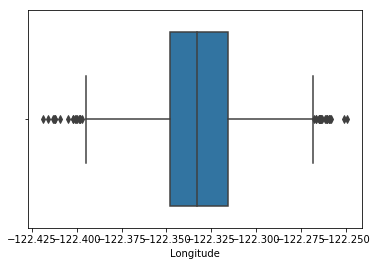

In [21]:
#Boxplot demonstrates any outlier values
sns.boxplot(x=df_copy['Longitude'])

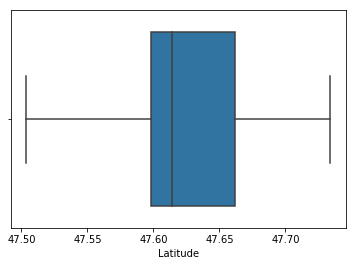

In [22]:
#Boxplot demonstrates any outlier values
sns.boxplot(x=df_copy['Latitude'])

In [23]:
#The following code removes the numeric columns from the DataFrame 
integer_cols = df.select_dtypes(include=[np.number]).columns

#The following then examines the zscore of the integer columns
z = df[integer_cols].apply(zscore)

#This code shows the index of zscore values over 2. From our chapter readings, outliers are considered as such if they are more 
#than 2 standard deviations from the mean. 
np.where(z>3)

#This code was inspired by the following resources: 
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
#https://stackoverflow.com/questions/24761998/pandas-compute-z-score-for-all-columns

(array([], dtype=int64), array([], dtype=int64))

#### The above code has identified potential outlliers. This is defined by those integer columns with a z score in excess of 3, or numbers more than 3 standard deviations away from the mean. In this case, there are no outliers meeting this definition. However if there were outliers, they could be removed through the index received from the previous code as such: 

In [24]:
#The following code then removes the indexes of the outliers. Outliers were removed due to the number of them. There are only
#forty-four, so removing the outliers would be the most sensible way forward. 
#This code utilized the following resource: 
#https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-index-labels/
#df_copy = df_copy.drop([df_copy.index[5], df_copy.index[7], df_copy.index[15], df_copy.index[37], df_copy.index[44], 
                     #df_copy.index[50], df_copy.index[55], df_copy.index[56], df_copy.index[78], df_copy.index[102], 
                     #df_copy.index[104], df_copy.index[124], df_copy.index[143], df_copy.index[158],  df_copy.index[163], 
                     #df_copy.index[190], df_copy.index[195],  df_copy.index[196], df_copy.index[197],  df_copy.index[198], 
                     #df_copy.index[292], df_copy.index[322], df_copy.index[363],  df_copy.index[387], df_copy.index[418], 
                     #df_copy.index[427], df_copy.index[439],  df_copy.index[460], df_copy.index[464], df_copy.index[490], 
                     #df_copy.index[491], df_copy.index[525], df_copy.index[532], df_copy.index[565], df_copy.index[614], 
                     #df_copy.index[620], df_copy.index[631], df_copy.index[653], df_copy.index[654], df_copy.index[672], 
                     #df_copy.index[673], df_copy.index[688], df_copy.index[772], df_copy.index[775], df_copy.index[782], 
                     #df_copy.index[792], df_copy.index[793], df_copy.index[807], df_copy.index[816], df_copy.index[860], 
                     #df_copy.index[884], df_copy.index[904], df_copy.index[907], df_copy.index[909], df_copy.index[922], 
                     #df_copy.index[982], df_copy.index[989], df_copy.index[999], df_copy.index[1020]])

In [25]:
#This validates the removal of outliers
#df_copy

In [26]:
#The next code examines the categories for the Event Clearance Code column to assess value-feasibility
df_copy['Event Clearance Code'].value_counts()

245    123
280    105
470     67
460     65
430     62
161     54
63      53
177     50
250     39
281     35
200     32
220     25
40      24
244     24
201     22
64      21
450     18
65      16
71      15
130     14
350     13
242     13
282     10
372     10
52       9
50       9
203      7
184      7
41       6
246      6
      ... 
53       4
415      4
410      4
188      3
363      3
139      3
160      3
261      3
73       3
51       3
202      3
440      3
465      3
31       3
62       2
371      2
192      2
101      2
141      2
186      2
292      1
341      1
260      1
243      1
170      1
171      1
221      1
181      1
183      1
191      1
Name: Event Clearance Code, Length: 65, dtype: int64

In [27]:
#The next code examines the categories for Event Clearance Group to assess value-feasibility
df_copy['Event Clearance Group'].value_counts()

DISTURBANCES                             167
TRAFFIC RELATED CALLS                    164
SUSPICIOUS CIRCUMSTANCES                 150
FALSE ALACAD                              64
MOTOR VEHICLE COLLISION INVESTIGATION     62
CAR PROWL                                 58
LIQUOR VIOLATIONS                         55
TRESPASS                                  54
NUISANCE, MISCHIEF                        39
BEHAVIORAL HEALTH                         26
BURGLARY                                  25
ASSAULTS                                  24
SHOPLIFTING                               21
AUTO THEFTS                               18
PROPERTY DAMAGE                           17
OTHER PROPERTY                            16
NARCOTICS COMPLAINTS                      14
HAZARDS                                   13
PROPERTY - MISSING, FOUND                 12
ROBBERY                                    8
FRAUD CALLS                                6
THREATS, HARASSMENT                        6
PERSON DOW

In [28]:
#The next code examines the categories for the Event Clearance Subgroup column to assess value-feasibility

df_copy['Event Clearance SubGroup'].value_counts()

DISTURBANCES                      161
TRAFFIC RELATED CALLS             155
SUSPICIOUS CIRCUMSTANCES          150
PARKING VIOLATIONS                 71
CAR PROWL                          58
LIQUOR VIOLATIONS                  57
BURGLARY ALACAD (FALSE)            54
TRESPASS                           54
THEFT                              39
NUISANCE, MISCHIEF COMPLAINTS      39
CRISIS CALL                        26
ASSAULTS                           24
PROPERTY DAMAGE                    17
RESIDENTIAL BURGLARIES             16
AUTO THEFTS                        15
NARCOTICS COMPLAINTS               14
HAZARDS                            13
PROPERTY - MISSING, FOUND          12
PANIC ALACAD (FALSE)               10
COMMERCIAL BURGLARIES               9
NOISE DISTURBANCE                   6
THREATS, HARASSMENT                 6
FRAUD CALLS                         6
CASUALTIES                          5
GUN CALLS                           5
ANIMAL COMPLAINTS                   4
WARRANT CALL

#### For all the previous columns, values are within the realm of reason and do not require further cleaning

In [29]:
#The next code examines the categories for the Officers at Scene column to assess value-feasibility

df_copy['Officers at Scene'].value_counts()

1    317
2    256
3    238
0    126
4    108
Name: Officers at Scene, dtype: int64

In [30]:
# 0 seems incorrect at first glance. However, this could be caused by multiple reports for the same incident, with police
#already dispatched to the area. We will leave these numbers for this reason. 
#Though one potential fix would be to replace zeroes with 1 (depending on the situation): 
#Replace all the Zero Values with Ones in Officers at Scene Column
#df_copy['Officers at Scene'] = df_copy[['Officers at Scene']].replace({0:1})

In [31]:
#Test the code
#df_copy['Officers at Scene'].value_counts()

In [32]:
#The following code will demonstrate any duplicates in the data for the CAD Event Number values
df_copy[df_copy['CAD Event Number'].duplicated()]

,CAD Event Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,District/Sector,Census Tract,Longitude,Latitude,Officers at Scene


In [33]:
#The following code will demonstrate any duplicates in the data for the Event Clearance Description values
#This search is evidently too wide and pulls up nearly the entire data set
df_copy[df_copy['Event Clearance Description'].duplicated()]

,CAD Event Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,District/Sector,Census Tract,Longitude,Latitude,Officers at Scene
8,16000104918,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 17:18:00,O,9300.3019,-122.329056,47.579807,3
10,16000105010,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 17:36:00,K,9200.2028,-122.330810,47.600464,3
11,16000105007,280,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:31:00,R,10300.2004,-122.275380,47.551910,2
12,16000105002,460,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,2016-03-26 17:29:00,E,7500.4006,-122.316830,47.614105,0
13,16000104957,280,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:28:00,O,9300.3167,-122.328960,47.555634,3
14,16000104941,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 17:30:00,J,2900.1000,-122.355300,47.689835,3
15,16000104933,281,SUSPICIOUS VEHICLE,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:29:00,S,11102.2008,-122.269910,47.542492,3
20,16000105001,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 17:40:00,M,8200.1010,-122.332245,47.612072,3
22,16000104988,280,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:30:00,J,2900.2003,-122.355300,47.684746,1
23,16000104984,280,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:40:00,O,9300.1047,-122.321396,47.586205,2


#### The above code helps the user identify which of the previous incidents are the most frequent

In [34]:
#The following code will demonstrate any duplicates in the data for the Event Clearance Date values 
#This search showed 200 observations and helps the user review for which dates one can expect a rise in incidents 
df_copy[df_copy['Event Clearance Date'].duplicated()]

,CAD Event Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,District/Sector,Census Tract,Longitude,Latitude,Officers at Scene
4,16000104993,281,SUSPICIOUS VEHICLE,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:19:00,G,8800.3008,-122.301090,47.604320,1
5,16000104992,176,LIQUOR VIOLATION - ADULT,LIQUOR VIOLATIONS,LIQUOR VIOLATIONS,2016-03-26 17:17:00,S,11800.6020,-122.268030,47.519850,2
7,16000104962,201,ALACAD - RESIDENTIAL BURGLARY (FALSE),BURGLARY ALACAD (FALSE),FALSE ALACAD,2016-03-26 17:17:00,S,11900.2016,-122.250630,47.506386,1
8,16000104918,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 17:18:00,O,9300.3019,-122.329056,47.579807,3
15,16000104933,281,SUSPICIOUS VEHICLE,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:29:00,S,11102.2008,-122.269910,47.542492,3
17,16000104752,250,"MISCHIEF, NUISANCE COMPLAINTS","NUISANCE, MISCHIEF COMPLAINTS","NUISANCE, MISCHIEF",2016-03-26 17:30:00,R,10200.4025,-122.274760,47.551910,4
21,16000104999,430,MOTOR VEHICLE COLLISION,TRAFFIC RELATED CALLS,MOTOR VEHICLE COLLISION INVESTIGATION,2016-03-26 17:39:00,H,9900.2019,-122.362870,47.561085,1
22,16000104988,280,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:30:00,J,2900.2003,-122.355300,47.684746,1
23,16000104984,280,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:40:00,O,9300.1047,-122.321396,47.586205,2
24,16000104855,186,"NARCOTICS, DRUG TRAFFIC LOITERING",NARCOTICS COMPLAINTS,NARCOTICS COMPLAINTS,2016-03-26 17:31:00,B,3300.3013,-122.378880,47.673820,3


In [35]:
#The following code will demonstrate any duplicates in the data for the Longitude and Latitude values 
df_copy[df_copy.duplicated(subset = ['Longitude', 'Latitude'], keep = False)]

,CAD Event Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,District/Sector,Census Tract,Longitude,Latitude,Officers at Scene
6,16000104986,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 17:18:00,R,10001.1002,-122.299160,47.579674,3
8,16000104918,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 17:18:00,O,9300.3019,-122.329056,47.579807,3
10,16000105010,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 17:36:00,K,9200.2028,-122.330810,47.600464,3
20,16000105001,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 17:40:00,M,8200.1010,-122.332245,47.612072,3
23,16000104984,280,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:40:00,O,9300.1047,-122.321396,47.586205,2
28,16000104981,470,PARKING VIOLATION (EXCEPT ABANDONED VEHICLES),PARKING VIOLATIONS,TRAFFIC RELATED CALLS,2016-03-26 17:43:00,E,7500.5004,-122.320880,47.619904,0
29,16000104978,161,TRESPASS,TRESPASS,TRESPASS,2016-03-26 17:43:00,G,9100.1002,-122.318430,47.599186,2
37,16000105021,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 18:01:00,H,401.1006,-122.347770,47.731678,1
38,16000105011,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 18:02:00,E,7500.4006,-122.318140,47.614094,3
43,16000104605,100,FRAUD (INCLUDING IDENTITY THEFT),FRAUD CALLS,FRAUD CALLS,2016-03-26 17:51:00,B,3400.1007,-122.366035,47.675625,0


In [36]:
#This identifies areas in which incidents are more likely to occur. These values do not necessitate cleaning. However if they 
#did need to be cleaned due to inaccurate inputting, the following code would work: 
#This code keeps the first Longitude and Latitude entry and drops the duplicate
#df_copy.drop_duplicates(subset=['Longitude', 'Latitude'], keep='first', inplace=True)

In [37]:
#Test the code
#df_copy[df_copy.duplicated(subset = ['Longitude', 'Latitude'], keep = False)]

In [38]:
#save the cleaned document to csv 
df_copy.to_csv('Clean Data.csv', index=False)

## III. Create Data Sheets

### 1.) Table: date and number of events

In [39]:
date_num_events = df_copy['Event Clearance Date'].value_counts()
date_num_events

2016-03-27 01:01:00    5
2016-03-26 19:33:00    4
2016-03-26 17:30:00    4
2016-03-28 08:56:00    4
2016-03-28 10:55:00    4
2016-03-26 20:09:00    4
2016-03-27 16:14:00    4
2016-03-26 20:50:00    4
2016-03-27 15:41:00    3
2016-03-27 01:02:00    3
2016-03-26 18:57:00    3
2016-03-26 22:33:00    3
2016-03-27 03:18:00    3
2016-03-28 11:03:00    3
2016-03-27 11:54:00    3
2016-03-28 08:30:00    3
2016-03-27 17:50:00    3
2016-03-26 22:16:00    3
2016-03-26 20:25:00    3
2016-03-27 15:57:00    3
2016-03-26 17:17:00    3
2016-03-27 11:59:00    3
2016-03-27 17:39:00    3
2016-03-28 10:37:00    3
2016-03-27 19:17:00    3
2016-03-28 00:55:00    3
2016-03-26 19:38:00    3
2016-03-26 19:44:00    3
2016-03-27 00:39:00    3
2016-03-27 21:54:00    3
                      ..
2016-03-26 23:46:00    1
2016-03-27 14:25:00    1
2016-03-26 18:52:00    1
2016-03-28 09:57:00    1
2016-03-28 04:32:00    1
2016-03-26 23:44:00    1
2016-03-26 19:00:00    1
2016-03-28 00:20:00    1
2016-03-27 04:57:00    1


In [40]:
date_num_events.to_csv('table1.csv', index=False)

### 2.)  Bar graph: date and number of events

In [41]:
xvalues = df_copy['Event Clearance Date'].unique()
yvaluecounts = df_copy['Event Clearance Date'].value_counts()

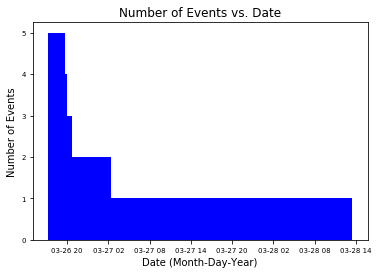

<Figure size 432x288 with 0 Axes>

In [42]:
plt.bar(xvalues, yvaluecounts, color='blue', align='edge', width=0.1)
plt.tick_params(labelsize = 7)
plt.ylabel('Number of Events')
plt.xlabel('Date (Month-Day-Year)')
plt.title('Number of Events vs. Date')
plt.show()
fig = plt.figure()
fig.savefig('figure1.png')

### Observation

- What is clear both from the table and the bar chart is that there is a sharp uptick in crime on 3-26, followed by a marked leveling. This can be useful when the police are attempting to increase staff on certain days to prepare for the incoming volume of calls and incidents. 

### 3.)  Table: number of incident occurrences by event type

In [43]:
incidents_by_type = df_copy['Event Clearance Group'].value_counts()
incidents_by_type

DISTURBANCES                             167
TRAFFIC RELATED CALLS                    164
SUSPICIOUS CIRCUMSTANCES                 150
FALSE ALACAD                              64
MOTOR VEHICLE COLLISION INVESTIGATION     62
CAR PROWL                                 58
LIQUOR VIOLATIONS                         55
TRESPASS                                  54
NUISANCE, MISCHIEF                        39
BEHAVIORAL HEALTH                         26
BURGLARY                                  25
ASSAULTS                                  24
SHOPLIFTING                               21
AUTO THEFTS                               18
PROPERTY DAMAGE                           17
OTHER PROPERTY                            16
NARCOTICS COMPLAINTS                      14
HAZARDS                                   13
PROPERTY - MISSING, FOUND                 12
ROBBERY                                    8
FRAUD CALLS                                6
THREATS, HARASSMENT                        6
PERSON DOW

In [44]:
incidents_by_type.to_csv('table2.csv', index=False)

### 4.) Bar graph: number of incident occurrences by event type

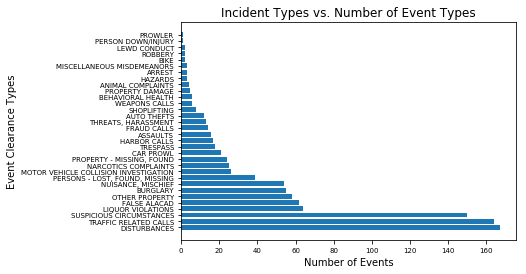

<Figure size 432x288 with 0 Axes>

In [45]:
xvalues = df_copy['Event Clearance Group'].unique()
yvaluecounts = df_copy['Event Clearance Group'].value_counts()
plt.barh(xvalues, yvaluecounts)
plt.tick_params(labelsize = 7)
plt.ylabel('Event Clearance Types')
plt.xlabel('Number of Events')
plt.title('Incident Types vs. Number of Event Types')
plt.show()
fig = plt.figure()
fig.savefig('figure2.png')

### Observation

- What is clear from both the table and th bar chart is that there are many more Disturbances, Traffic Related Calls, and Suspicious Circumstances. This can be useful when training the police department and selecting special areas of emphasis. 

### 5.) Table: sectors and number of events

In [46]:
sector_num_events = df_copy['District/Sector'].value_counts()
sector_num_events

H    125
M     91
E     86
B     83
K     64
Q     62
R     60
D     60
N     53
U     52
S     44
C     44
J     41
G     39
L     38
W     37
F     35
O     31
Name: District/Sector, dtype: int64

In [47]:
sector_num_events.to_csv('table3.csv', index=False)

### 6.) Bar graph: sectors and number of events

In [48]:
#Changing the datatype to string will insure the bar chart categorizes the Districts correctly 
df_copy['District/Sector'] = df_copy['District/Sector'].astype('str')

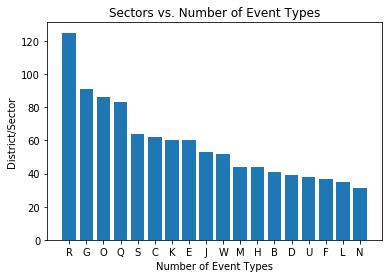

<Figure size 432x288 with 0 Axes>

In [49]:
xvalues = df_copy['District/Sector'].unique()
yvaluecounts = df_copy['District/Sector'].value_counts()
plt.bar(xvalues, yvaluecounts)
plt.ylabel('District/Sector')
plt.xlabel('Number of Event Types')
plt.title('Sectors vs. Number of Event Types')
plt.show()
fig = plt.figure()
fig.savefig('figure3.png')

### Observation

- Evidently, there is quite a lot more crime in District R than there is in District S. This could pose a clear picture of where to locate more police officers. 

# Summary

There is quite a lot of useful data that can be utilized to assist the police department in training personnel, anticipating high volume crime times, and determining locations to place officers. The data needed to be thoroughly cleaned before this information could be accurately assessed. However, once that was complete, there were many relationships to explore. 

To clean the data I conducted visual analysis by calling info, describe, dupicated, and isnull functions to understand duplicate entries, missing data, and visualize and inconsistencies in data entry. There were several features in the data: namely excess columns, column headers, column data types, and NaN observations. 

I cleaned the data, removing only one column with multiple NaN entries. I then began to observe the outliers using the zscore method and found none. While observing the data I was able to notice high-incident days as well as high-incident areas which was substantiated when I established tables and graphs off that data. 